<h1 align="right" style="color: #FF5733">TITANIC MACHINE LEARNING FROM DISASTER</h1>
<h3 align="right">Prashant Sundge</h3>


# Table of Contents

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Dictionary](#data-dictionary)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Data Preprocessing](#data-preprocessing)
6. [Feature Engineering](#feature-engineering)
7. [Model Building](#model-building)
8. [Evaluation](#evaluation)
9. [Conclusion](#conclusion)


# Introduction

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e., name, age, gender, socio-economic class, etc).


# Data-overview

# Dataset Description

### Overview

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)


- **The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- **The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

- We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


# Data-dictionary

| Variable  | Definition                   | Key                                      |
|-----------|------------------------------|------------------------------------------|
| survival  | Survival                     | 0 = No, 1 = Yes                          |
| pclass    | Ticket class                 | 1 = 1st, 2 = 2nd, 3 = 3rd              |
| sex       | Sex                          |                                        |
| Age       | Age in years                 |                                        |
| sibsp     | # of siblings / spouses      |                                        |
|           | aboard the Titanic           |                                        |
| parch     | # of parents / children      |                                        |
|           | aboard the Titanic           |                                        |
| ticket    | Ticket number                |                                        |
| fare      | Passenger fare               |                                        |
| cabin     | Cabin number                 |                                        |
| embarked  | Port of Embarkation          | C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes:**

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.

- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore parch=0 for them.


# IMPORT LIBRARY 

In [108]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('data\\train.csv')

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### NOTES 

- AGE has missing values 
- cabin has only 204 values 
- Embarkded has 2 missing values 

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age Null values has been filled with Median values

In [6]:
data['Age'].median()
data['Age']=data['Age'].fillna(data['Age'].median())

In [7]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- For Now will drop the Cabin column as we can see 687 nan values 
- Also we will remove PassangeID , Name , Ticket columns 

In [8]:
data1=data.drop(columns=['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [9]:
data1.head(1)

Survived  Pclass   Sex   Age  SibSp  Parch  Fare Embarked
0         0       3  male  22.0      1      0  7.25        S

In [10]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data1['Embarked'].dropna(inplace=True)

In [13]:
data1 = data1.dropna(subset=['Embarked'])

In [14]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

# EXPLORATORY DATA ANALYSIS 

<AxesSubplot:xlabel='Sex', ylabel='count'>

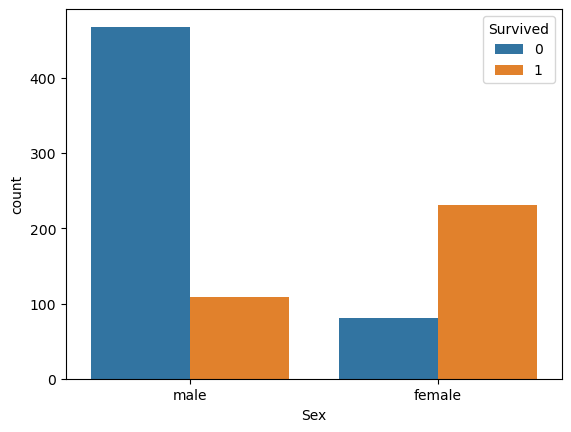

In [16]:
sns.countplot(data=data1, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

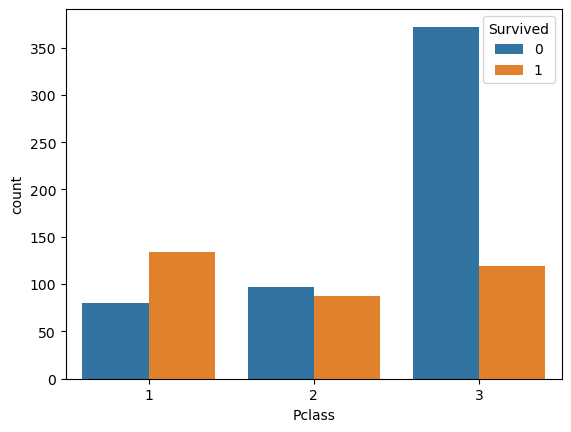

In [17]:
sns.countplot(data=data1, x='Pclass', hue='Survived')

In [18]:
sns.countplot(data=data1, x='Parch', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

<AxesSubplot:xlabel='Embarked', ylabel='count'>

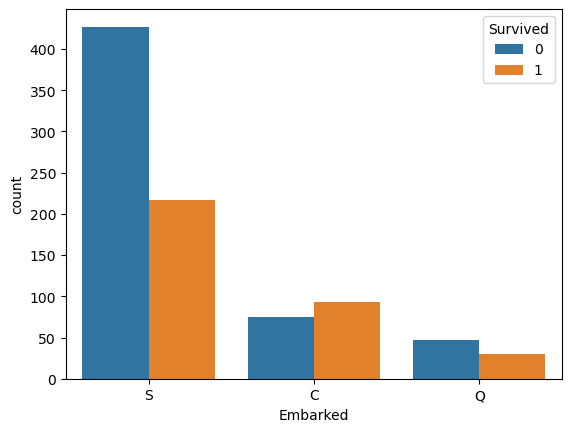

In [21]:
sns.countplot(data=data1, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Age'>

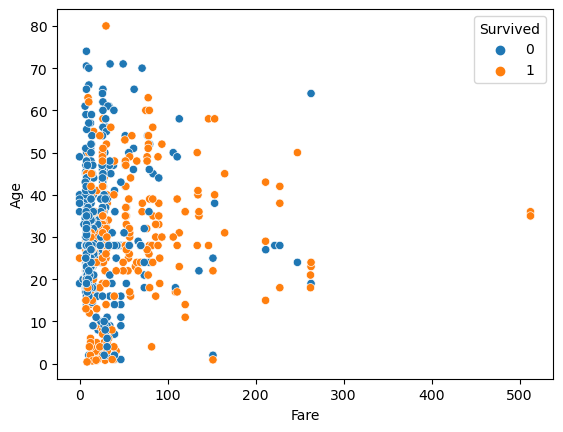

In [29]:
sns.scatterplot(data=data1, x='Fare', y='Age',hue='Survived')

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [40]:
data1['Sex'].replace({'male':1, 'female':0}, inplace=True)

In [42]:
data1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [43]:
data1 = pd.get_dummies(data1, columns=['Embarked'], prefix=['Embarked'])

In [46]:
data1.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.335549 -0.541585 -0.069822 -0.034040  0.083151   
Pclass     -0.335549  1.000000  0.127741 -0.336512  0.081656  0.016824   
Sex        -0.541585  0.127741  1.000000  0.086506 -0.116348 -0.247508   
Age        -0.069822 -0.336512  0.086506  1.000000 -0.232543 -0.171485   
SibSp      -0.034040  0.081656 -0.116348 -0.232543  1.000000  0.414542   
Parch       0.083151  0.016824 -0.247508 -0.171485  0.414542  1.000000   
Fare        0.255290 -0.548193 -0.179958  0.093707  0.160887  0.217532   
Embarked_C  0.169966 -0.245733 -0.084520  0.032098 -0.060074 -0.011588   
Embarked_Q  0.004536  0.220558 -0.075217 -0.030436 -0.026692 -0.081585   
Embarked_S -0.151777  0.076466  0.121405 -0.008964  0.069438  0.061512   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.255290    0.169966    0.004536   -0.151777  
Pclass     -0.548193   -0.245733    0.220558    0.076466  
Sex        -0.179958   -0.084520   -0.075217    0.121405  
Age         0.093707    0.032098   -0.030436   -0.008964  
SibSp       0.160887   -0.060074   -0.026692    0.069438  
Parch       0.217532   -0.011588   -0.081585    0.061512  
Fare        1.000000    0.270731   -0.116684   -0.163758  
Embarked_C  0.270731    1.000000   -0.148646   -0.782613  
Embarked_Q -0.116684   -0.148646    1.000000   -0.499261  
Embarked_S -0.163758   -0.782613   -0.499261    1.000000

In [55]:
survived_count = data1['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survived_count, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')

plt.show()


<AxesSubplot:>

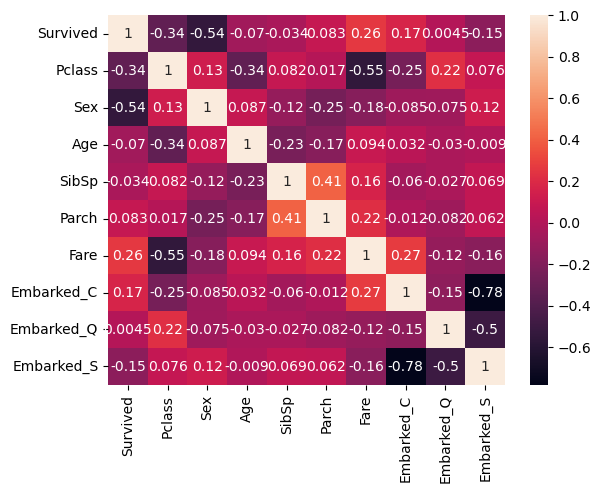

In [57]:
sns.heatmap(data1.corr(), annot=True,)

In [58]:
data1.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

# TRAIN TEST SPLIT

In [129]:
y=data1['Survived']

In [130]:
X=data1.drop('Survived', axis=1)

In [131]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0       3    1  22.0      1      0   7.2500           0           0   
1       1    0  38.0      1      0  71.2833           1           0   
2       3    0  26.0      0      0   7.9250           0           0   
3       1    0  35.0      1      0  53.1000           0           0   
4       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

# STANDARD SCALER

In [132]:
scale=StandardScaler()

In [136]:
X_scaled =scale.fit_transform(X)

In [137]:
X=pd.DataFrame(X_scaled)

In [138]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=123)

# NAIVE BAYES MODEL

In [139]:
gnb=GaussianNB()

In [140]:
gnb.fit(X_train, y_train)

GaussianNB()

In [141]:
y_pred=gnb.predict(X_test)

In [144]:
print("Number of mislabeled points out of a total %d points : %d"       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 267 points : 60


# ACCURECY

In [151]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7752808988764045


In [156]:
confusion=confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt='d')

[[137  24]
 [ 36  70]]


<AxesSubplot:>

In [159]:
classification=classification_report(y_test, y_pred)
print("Classification Report")
print(classification)

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       161
           1       0.74      0.66      0.70       106

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



# DECISION TREE

In [160]:
data1.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [166]:
selected_col=['Survived', 'Pclass','Sex','Age','SibSp', 'Parch', 'Fare']

In [167]:
df=data1[selected_col]

In [168]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [169]:
y=df['Survived']

In [170]:
X=df.drop('Survived', axis=1)

In [171]:
scaler=StandardScaler()

In [172]:
X_df=scaler.fit_transform(X)

In [175]:
X=pd.DataFrame(X_df)

In [176]:
X

0         1         2         3         4         5
0    0.825209  0.735342 -0.563674  0.431350 -0.474326 -0.500240
1   -1.572211 -1.359911  0.669217  0.431350 -0.474326  0.788947
2    0.825209 -1.359911 -0.255451 -0.475199 -0.474326 -0.486650
3   -1.572211 -1.359911  0.438050  0.431350 -0.474326  0.422861
4    0.825209  0.735342  0.438050 -0.475199 -0.474326 -0.484133
..        ...       ...       ...       ...       ...       ...
884 -0.373501  0.735342 -0.178396 -0.475199 -0.474326 -0.384475
885 -1.572211 -1.359911 -0.794841 -0.475199 -0.474326 -0.042213
886  0.825209 -1.359911 -0.101340  0.431350  2.006119 -0.174084
887 -1.572211  0.735342 -0.255451 -0.475199 -0.474326 -0.042213
888  0.825209  0.735342  0.206883 -0.475199 -0.474326 -0.490173

[889 rows x 6 columns]

In [177]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.33,random_state=123)

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
model=DecisionTreeClassifier()

In [181]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [182]:
y_pred=model.predict(x_test)

In [184]:
accurecy=accuracy_score(y_test,y_pred)
print(accurecy)

0.7619047619047619


In [187]:
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, fmt='d')
classification=classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       177
           1       0.70      0.69      0.70       117

    accuracy                           0.76       294
   macro avg       0.75      0.75      0.75       294
weighted avg       0.76      0.76      0.76       294



# RANDOM FOREST

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rfc=RandomForestClassifier(n_estimators=100)

In [196]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [197]:
Y_pred=rfc.predict(x_test)

Accurecy: 0.7959183673469388
Classification Report for Random Forest Model              precision    recall  f1-score   support

           0       0.80      0.88      0.84       177
           1       0.79      0.67      0.72       117

    accuracy                           0.80       294
   macro avg       0.79      0.77      0.78       294
weighted avg       0.80      0.80      0.79       294



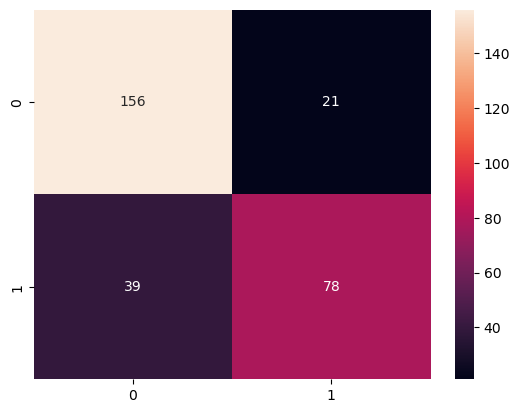

In [203]:
rfc_acc=accuracy_score(y_test, Y_pred)
print(f"Accurecy: {rfc_acc}")
rfc_report=classification_report(y_test, Y_pred)
print(f"Classification Report for Random Forest Model{rfc_report}")
rfc_conf=confusion_matrix(y_test, Y_pred)
sns.heatmap(rfc_conf, annot=True, fmt='d')
plt.show()